## Global

In [91]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [22]:
#Import dos arquivos csv
pilotos = pd.read_csv('./bases_br/pilotos.csv')
piloto_classificacoes = pd.read_csv('./bases_br/piloto_classificacoes.csv')
corridas = pd.read_csv('./bases_br/corridas.csv')
sprint_resultados = pd.read_csv('./bases_br/sprint_resultados.csv')
circuitos = pd.read_csv('./bases_br/circuitos.csv') 
tempo_por_volta = pd.read_csv('./bases_br/tempo_por_volta.csv') 
parada_boxes = pd.read_csv('./bases_br/parada_boxes.csv')
qualificacao = pd.read_csv('./bases_br/qualificacao.csv') 
resultados = pd.read_csv('./bases_br/resultados.csv')
construtores = pd.read_csv('./bases_br/construtores.csv')
construtor_classificacoes = pd.read_csv('./bases_br/construtor_classificacoes.csv')
construtor_resultados = pd.read_csv('./bases_br/construtor_resultados.csv')

## Análise exploratória

Análise de conjuntos de dados de modo a resumir suas características principais, Grafos e Estatísticas referentes a cada tabela

#### AE Pilotos

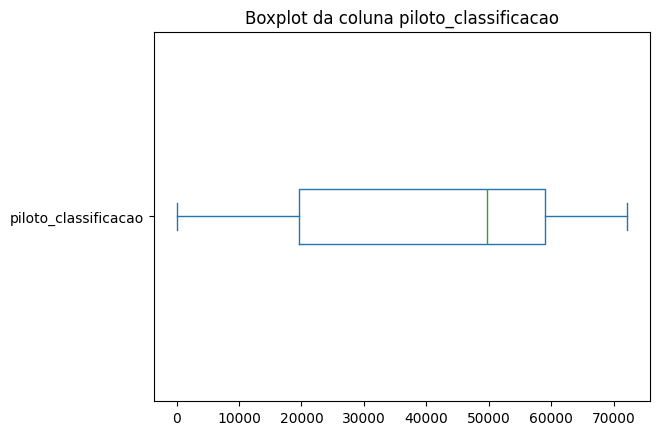

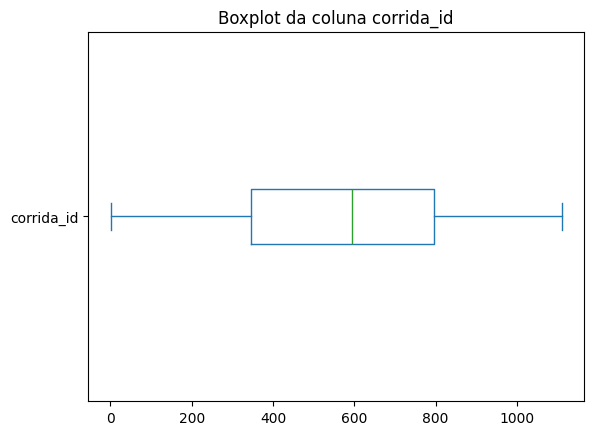

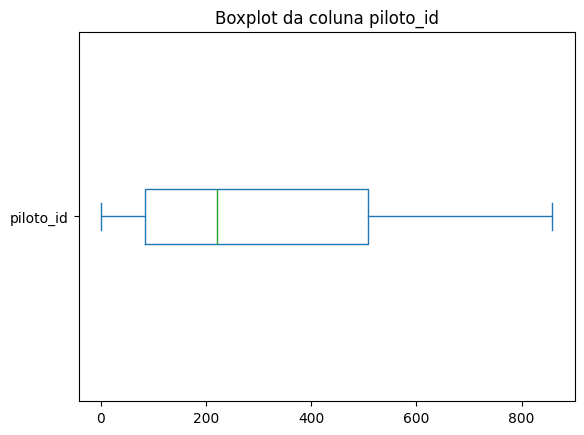

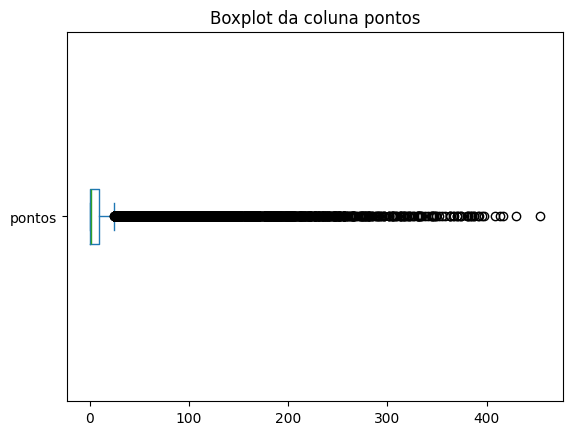

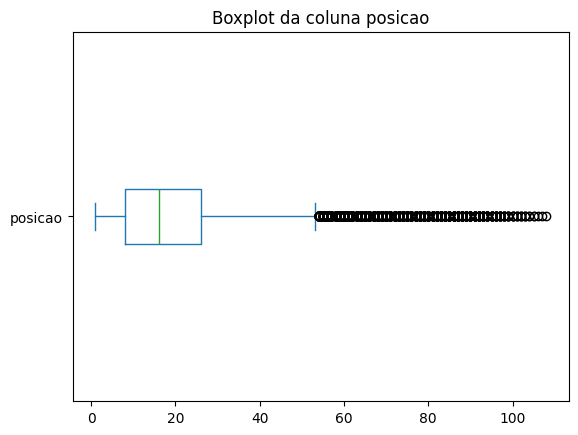

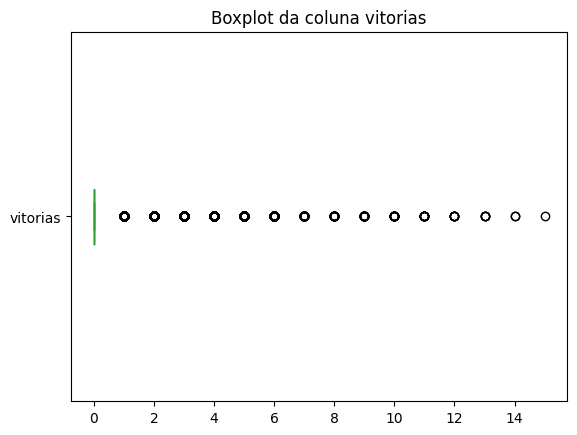

In [24]:
# Crie um boxplot para cada coluna numérica
for coluna in piloto_classificacoes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    piloto_classificacoes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

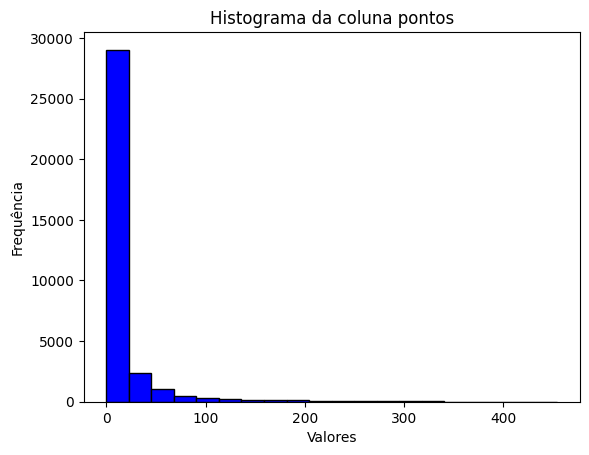

In [56]:
# Criar o histograma
plt.hist(piloto_classificacoes['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna pontos')

# Mostrar o gráfico
plt.show()

In [26]:
print(piloto_classificacoes['pontos'].max())
print(piloto_classificacoes['pontos'].min())

454.0
0.0


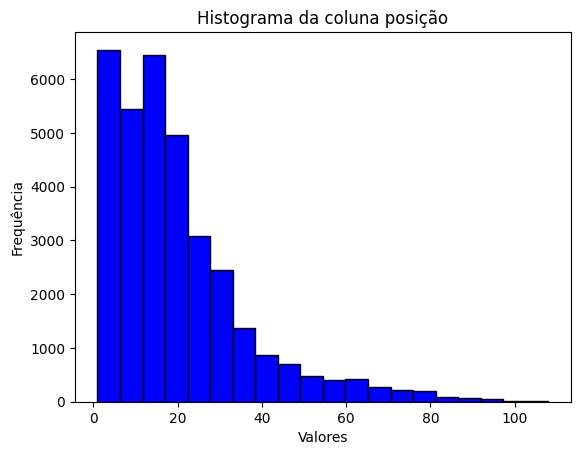

In [61]:
# Criar o histograma
plt.hist(piloto_classificacoes['posicao'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna posição')

# Mostrar o gráfico
plt.show()

In [28]:
print(piloto_classificacoes['posicao'].max())
print(piloto_classificacoes['posicao'].min())

108
1


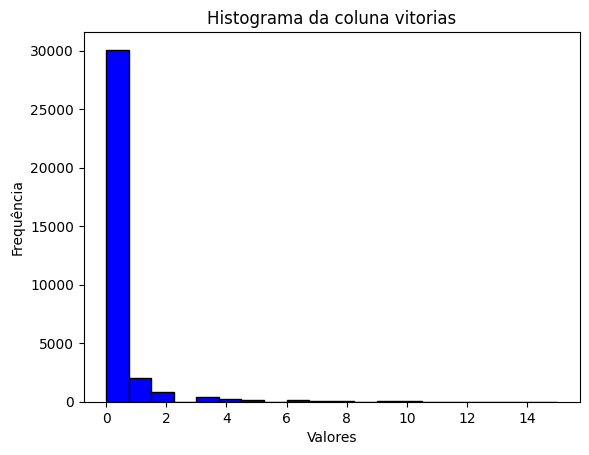

In [29]:
# Criar o histograma
plt.hist(piloto_classificacoes['vitorias'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [30]:
print(piloto_classificacoes['vitorias'].max())
print(piloto_classificacoes['vitorias'].min())

15
0


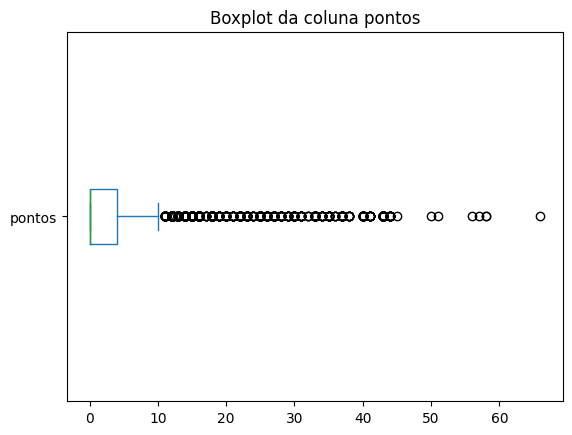

In [57]:
plt.figure()  # Crie uma nova figura para cada boxplot
construtor_resultados['pontos'].plot(kind='box', vert=False)
plt.title(f'Boxplot da coluna pontos')

# Exiba os boxplots
plt.show()

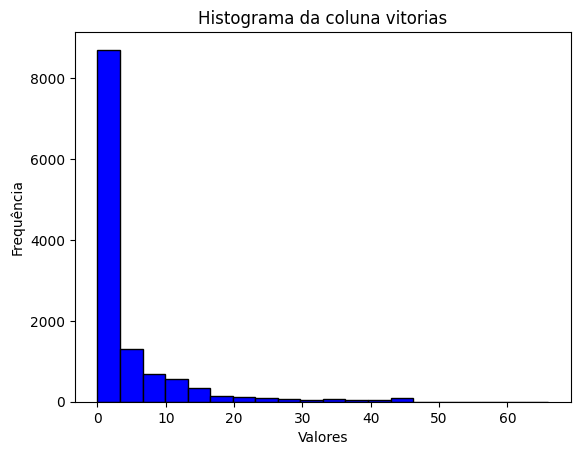

In [32]:
# Criar o histograma
plt.hist(construtor_resultados['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [33]:
print(construtor_resultados['pontos'].max())
print(construtor_resultados['pontos'].min())

66.0
0.0


In [62]:
pilotos

,piloto_id,piloto_ref,numero,codigo,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,21.0,DEV,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81.0,PIA,Oscar,Piastri,2001-04-06,Australian


##### Qual o piloto com mais pontos

In [64]:
# Merge das duas tabelas de acordo com o piloto_id (Piloto e Piloto_Classificações)
merged_df = pd.merge(piloto_classificacoes, pilotos, on='piloto_id')

# Agrupando por pilotos e somando o total de pontos
total_pontos = merged_df.groupby(['piloto_id', 'nome', 'sobrenome'])['pontos'].sum()

# Busca de pilotos com mais pontos
top_pilotos = total_pontos.nlargest(n=5)  # N = Numero de amostras de pilotos
# Mostrando os resultados
print("Pilotos com mais pontos:")
for piloto in top_pilotos.index:
    nome_piloto = ' '.join(piloto[1:])
    pontos = top_pilotos[piloto]
    print(f"{nome_piloto}: {pontos} pontos")

Pilotos com mais pontos:
Lewis Hamilton: 46550.5 pontos
Sebastian Vettel: 32026.0 pontos
Max Verstappen: 22486.5 pontos
Fernando Alonso: 21692.0 pontos
Valtteri Bottas: 19458.0 pontos


Text(0.5, 0, 'Numero de vitórias')

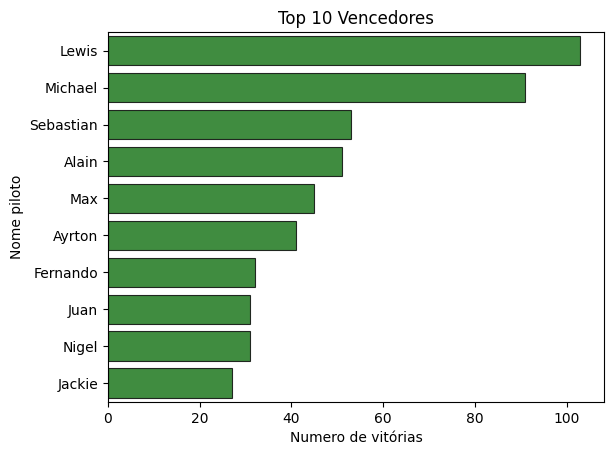

In [113]:
merged_df = pd.merge(resultados, pilotos, on='piloto_id')
piloto_vencedor = merged_df.loc[merged_df['posicao_ordem']==1].groupby('nome')['posicao_ordem'].count().sort_values(ascending=False).to_frame().reset_index()
top10Drivers = piloto_vencedor.head(10)
sns.barplot(data=top10Drivers,y='nome',x='posicao_ordem',color='green',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 Vencedores')
plt.ylabel('Nome piloto')
plt.xlabel('Numero de vitórias')

##### Qual piloto com mais corridas

In [116]:
merged_df = pd.merge(resultados, pilotos, on='piloto_id')


volta_rapidas = merged_df[merged_df['volta_rapida'] != '\\N']

volta_rapidas_contagem = volta_rapidas.groupby(['piloto_id', 'nome', 'sobrenome'])['volta_rapida'].count()


maiores_voltas_rapidas = volta_rapidas_contagem.idxmax()
nome_piloto = ' '.join(maiores_voltas_rapidas[1:])
volta_rapidas = volta_rapidas_contagem.max()


print("Piloto com voltas(corridas):", driver_name)
print("Numero de voltas rapidas:", fastest_laps)

Piloto com voltas(corridas): Fernando Alonso
Numero de voltas rapidas: 324


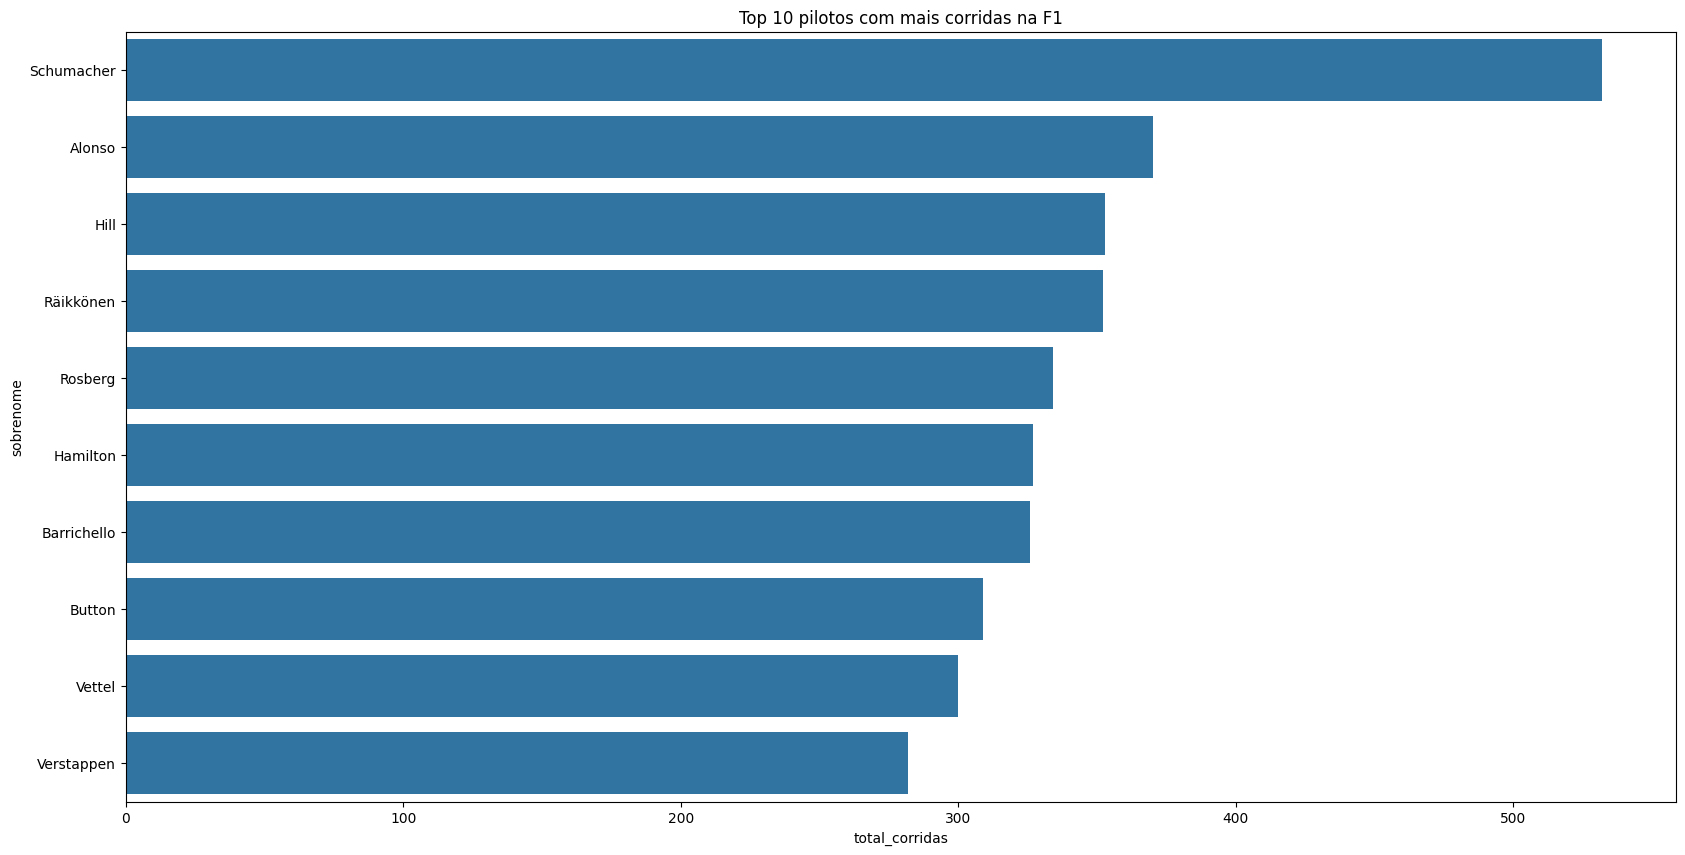

In [130]:
#En çok yarışan 10 F1 Pilotu
merged_df = pd.merge(resultados, pilotos, on='piloto_id')
mais_corridas = merged_df.groupby('sobrenome')[['corridas_id']].count().reset_index()
mais_corridas = mais_corridas.sort_values('corridas_id', ascending= False).head(10)
mais_corridas = mais_corridas.rename(columns ={'corridas_id': 'total_corridas'})
plt.figure(figsize = (20,10))
plt.title('Top 10 pilotos com mais corridas na F1')
sns.barplot(x = 'total_corridas' , y = 'sobrenome' , data = mais_corridas );

#### AE Constutores

In [72]:
resultados

,Unnamed: 0,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26075,26081,1110,817,213,3.0,19,16.0,16,16,0.0,44,+1:43.071,5053521.0,25.0,15.0,1:50.994,227.169,1
26076,26076,26082,1110,858,3,2.0,18,17.0,17,17,0.0,44,+1:44.476,5054926.0,37.0,9.0,1:50.486,228.213,1
26077,26077,26083,1110,807,210,27.0,0,18.0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1
26078,26078,26084,1110,832,6,55.0,4,NaN,R,19,0.0,23,NaN,NaN,9.0,19.0,1:53.138,222.864,130


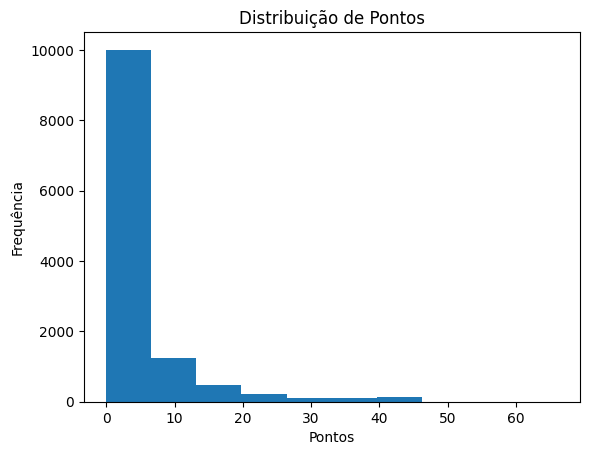

In [48]:
# Histograma dos pontos dos construtores
construtor_resultados['pontos'].plot(kind='hist')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.title('Distribuição de Pontos')
plt.show()

##### Construtores com mais corridas

In [77]:
melhores_times=construtores.merge(construtor_resultados,on = 'construtor_id',how = 'left')
melhores_times = melhores_times[['nome','pontos','corrida_id']]
melhores_times = melhores_times.groupby('nome')['corrida_id'].nunique().sort_values(ascending = False).reset_index(name = 'corridas')
melhores_times = melhores_times[melhores_times['corridas'] >= 100]
melhores_times

,nome,corridas
0,Ferrari,1012
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Sauber,395
6,Team Lotus,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


C:\Users\jpa\AppData\Local\Temp\ipykernel_11072\3463600052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridas', y='nome', data=melhores_times, palette='Spectral')


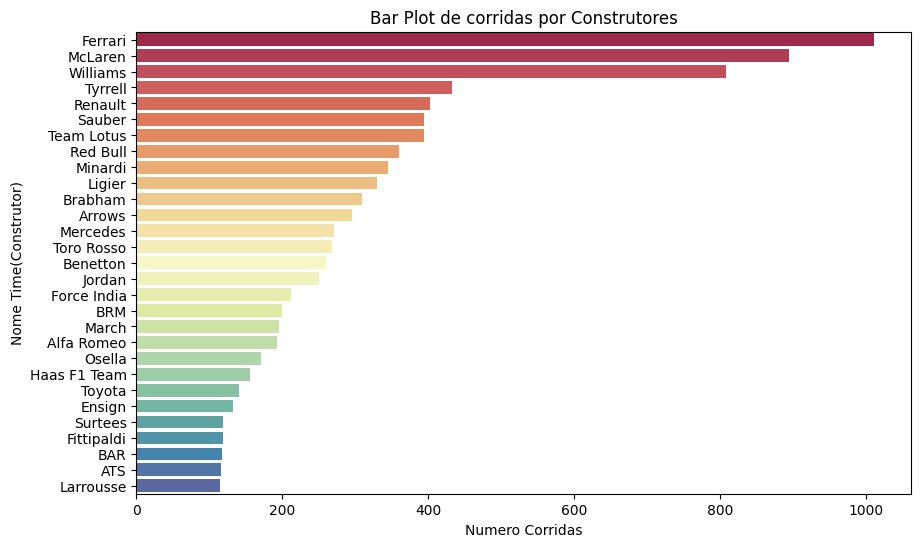

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='corridas', y='nome', data=melhores_times, palette='Spectral')
plt.xlabel('Numero Corridas')  
plt.ylabel('Nome Time(Construtor)')  
plt.title('Bar Plot de corridas por Construtores')  
plt.show()

##### Construtores com mais pontos

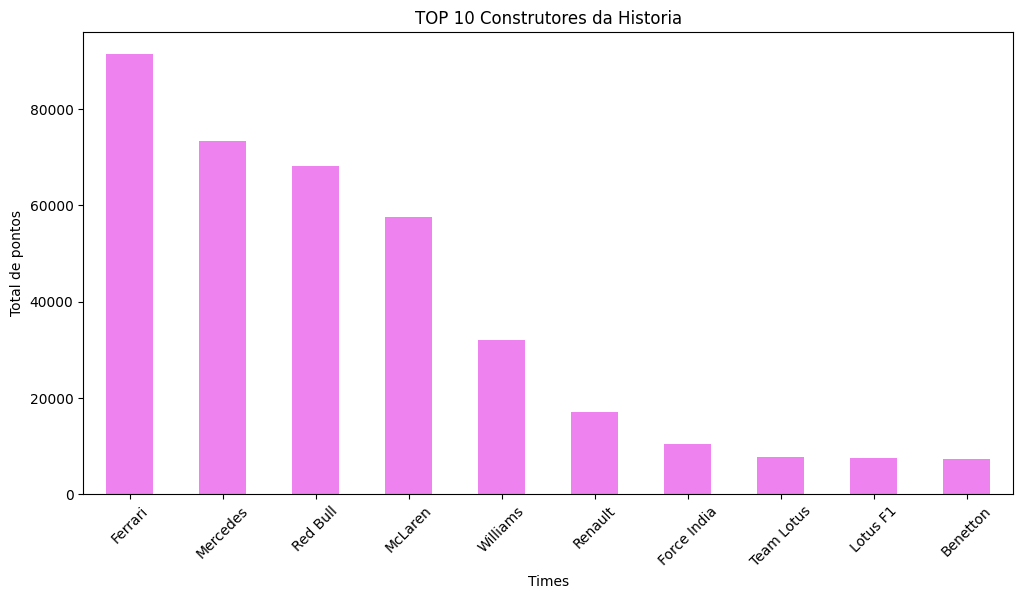

In [50]:
melhores_construtores = pd.merge(construtor_classificacoes, construtores, on='construtor_id')
melhores_construtores = melhores_construtores.groupby('nome')['pontos'].sum()
melhores_construtores = melhores_construtores.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
melhores_construtores.plot(kind='bar', color='violet')
plt.xlabel('Times')
plt.ylabel('Total de pontos')
plt.title('TOP 10 Construtores da Historia')
plt.xticks(rotation=45)
plt.show()

#### AE Sprint Resultados

In [34]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426.0,14.0,1:30.013,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856.0,17.0,1:29.937,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928.0,17.0,1:29.958,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704.0,16.0,1:30.163,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537.0,16.0,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004.0,6.0,2:03.482,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260.0,6.0,2:03.472,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700.0,7.0,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,NaN,NaN,2.0,2:02.516,130


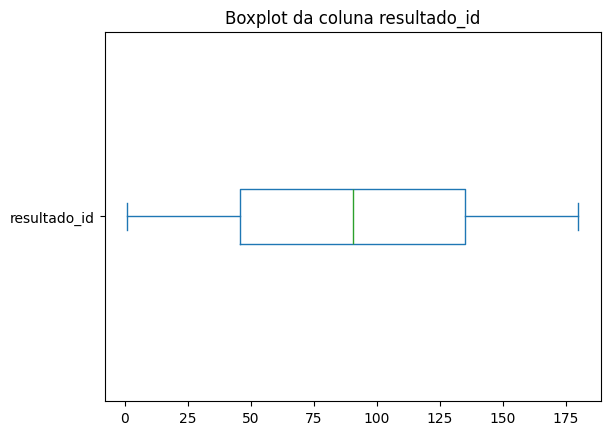

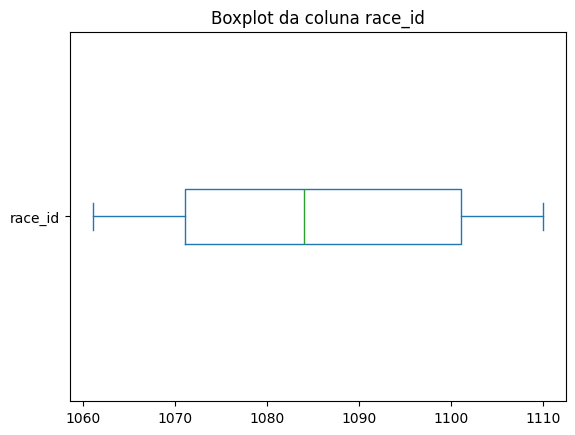

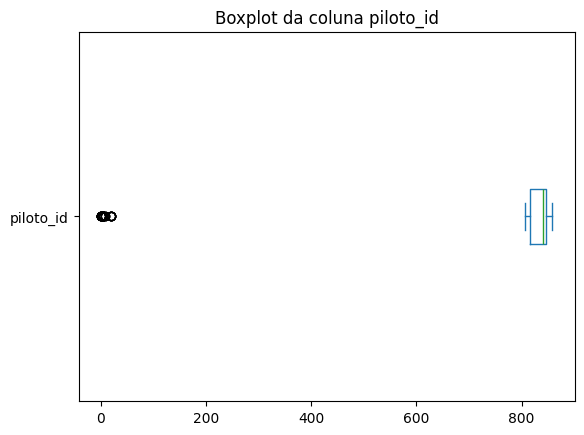

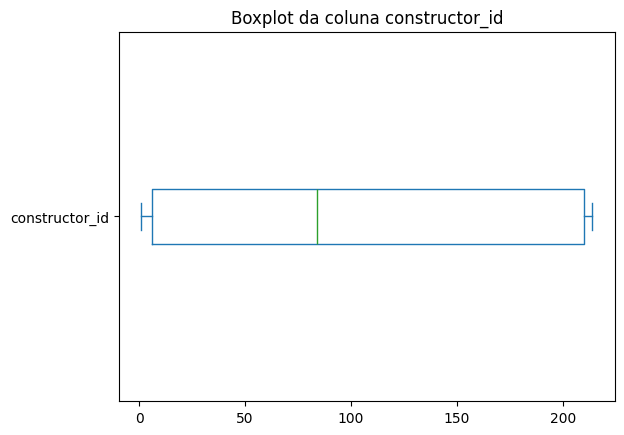

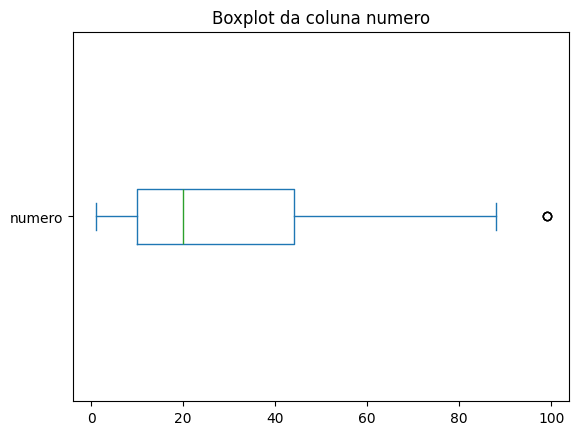

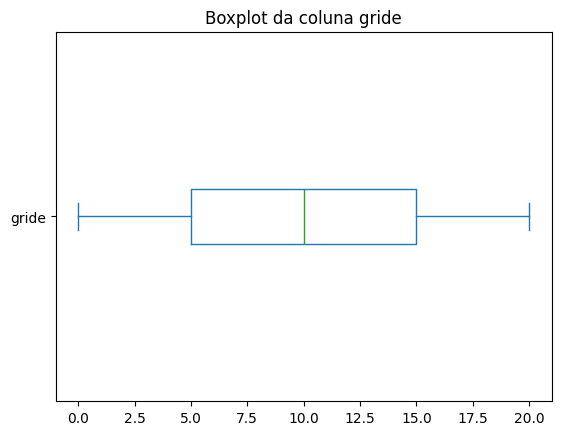

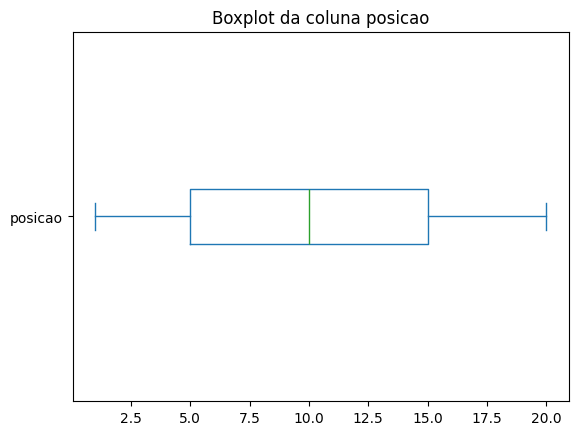

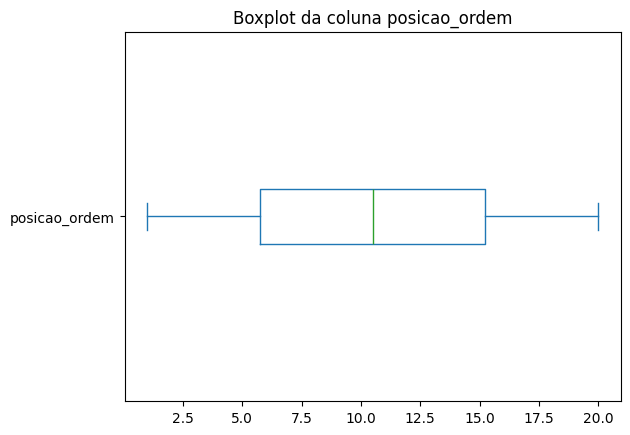

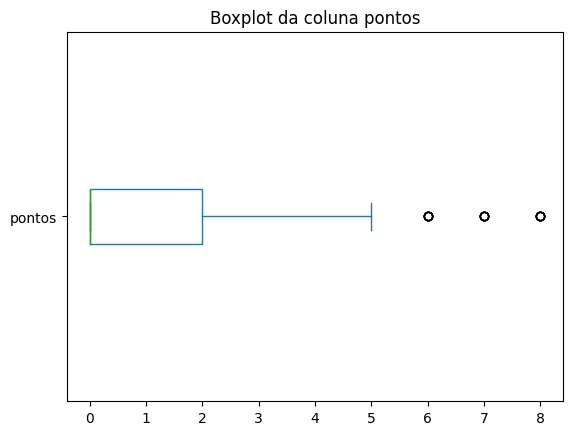

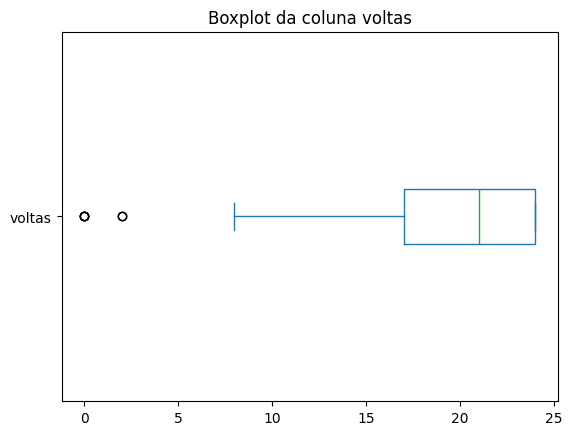

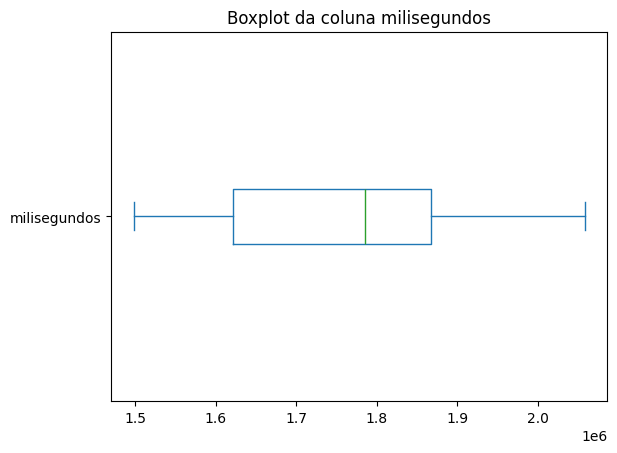

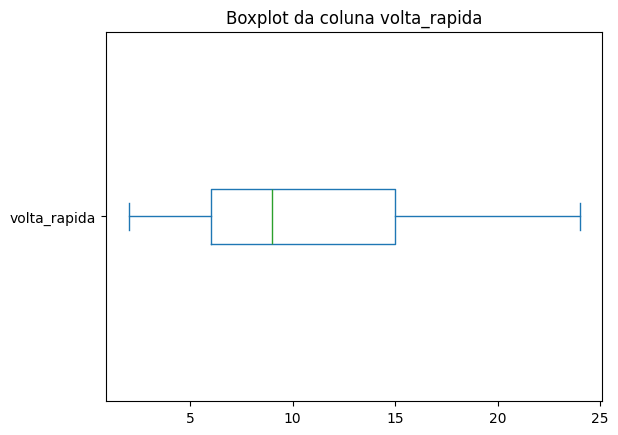

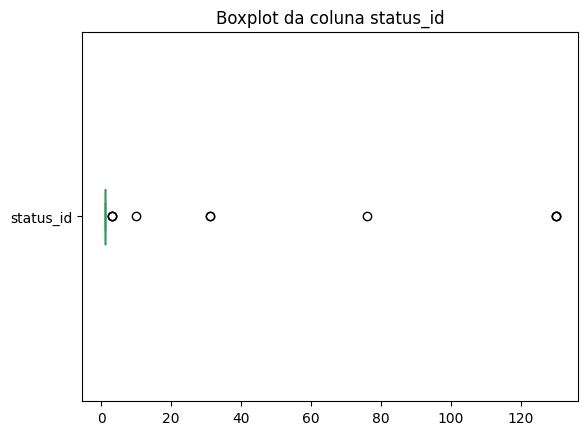

In [35]:
# Crie um boxplot para cada coluna numérica
for coluna in sprint_resultados.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    sprint_resultados[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

#### AE Parada_Boxes:

In [37]:
parada_boxes

,corrida_id,piloto_id,parada,volta,tempo,duracao,milisegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


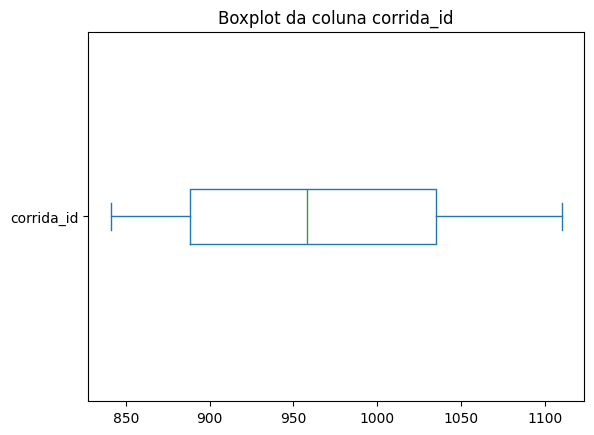

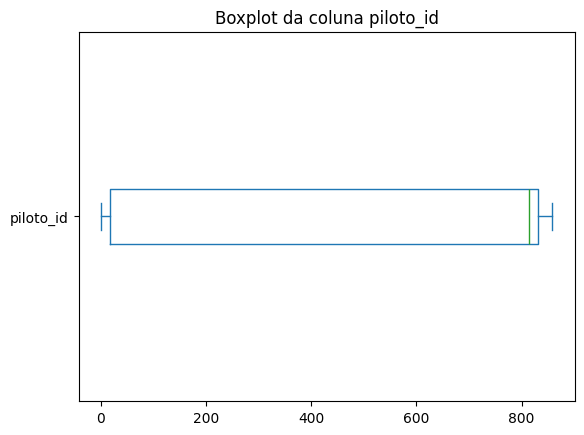

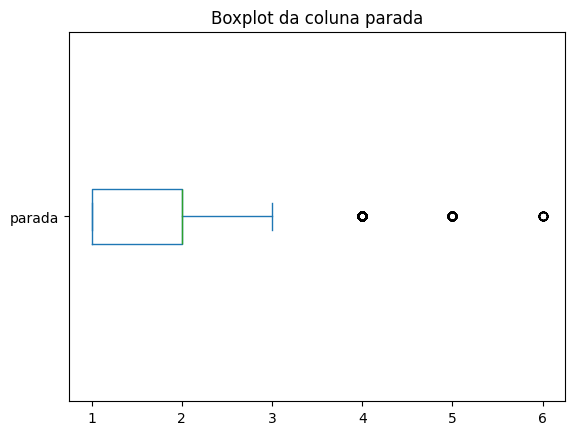

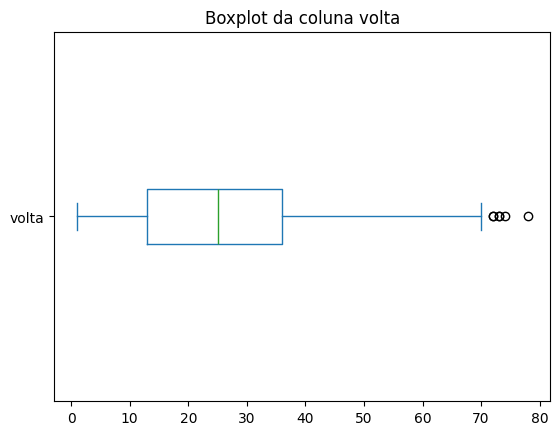

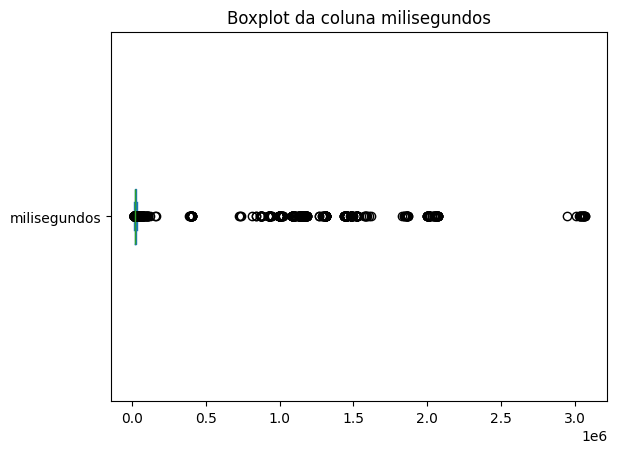

In [38]:
# Crie um boxplot para cada coluna numérica
for coluna in parada_boxes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    parada_boxes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

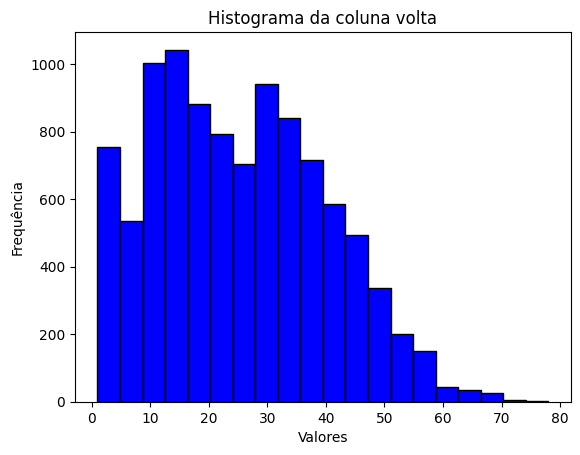

In [39]:
plt.hist(parada_boxes['volta'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna volta')

# Mostrar o gráfico
plt.show()

In [40]:
print(parada_boxes['volta'].max())
print(parada_boxes['volta'].min())

78
1


#### AE Resultados

In [58]:
resultados

,Unnamed: 0,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26075,26081,1110,817,213,3.0,19,16.0,16,16,0.0,44,+1:43.071,5053521.0,25.0,15.0,1:50.994,227.169,1
26076,26076,26082,1110,858,3,2.0,18,17.0,17,17,0.0,44,+1:44.476,5054926.0,37.0,9.0,1:50.486,228.213,1
26077,26077,26083,1110,807,210,27.0,0,18.0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1
26078,26078,26084,1110,832,6,55.0,4,NaN,R,19,0.0,23,NaN,NaN,9.0,19.0,1:53.138,222.864,130


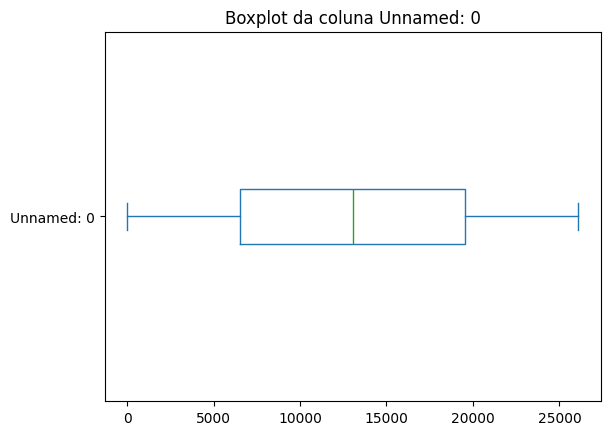

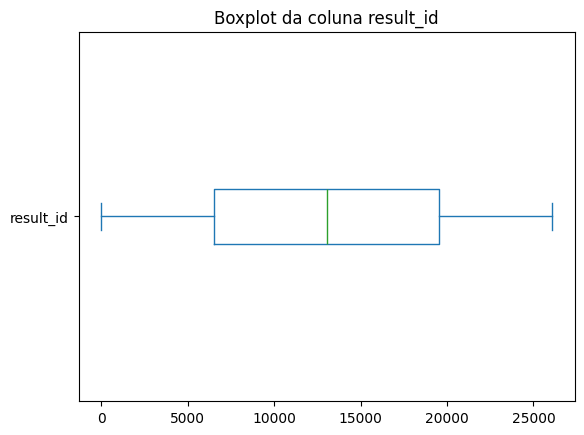

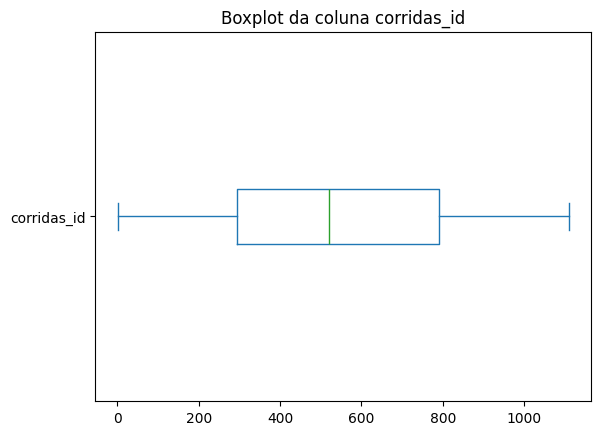

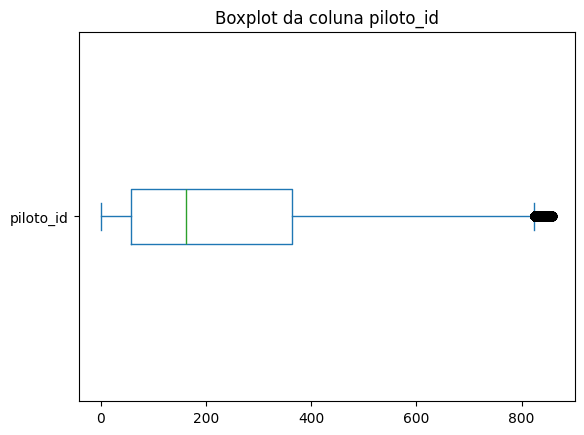

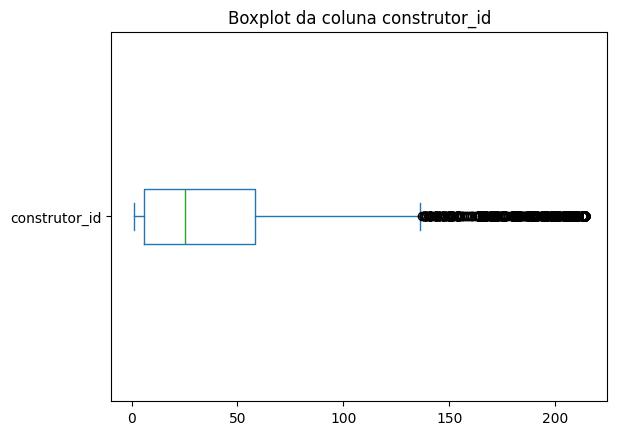

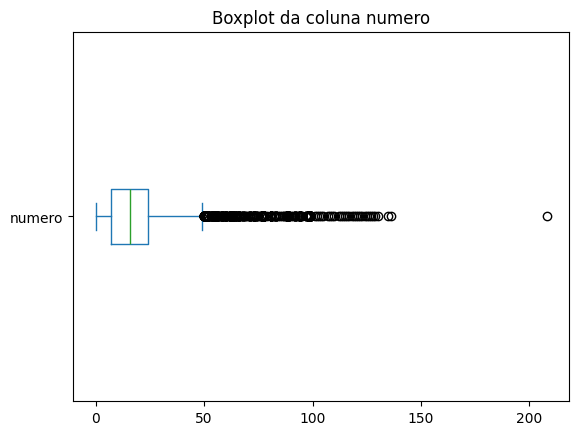

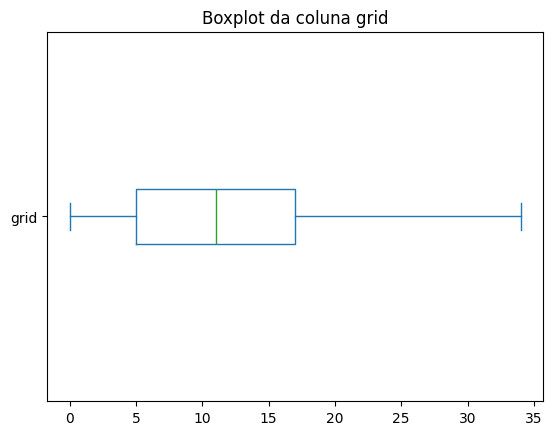

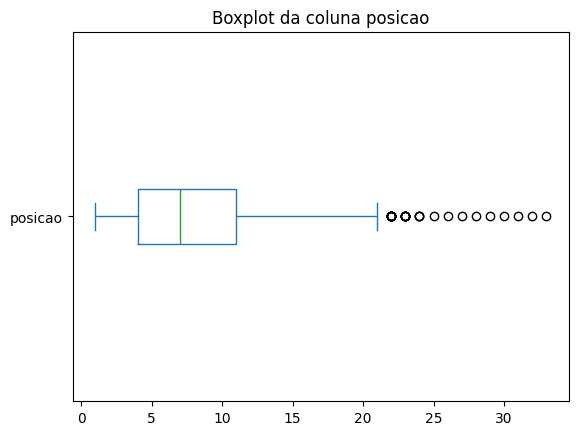

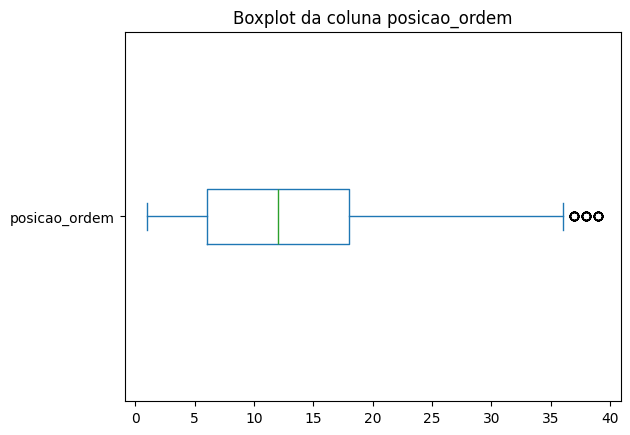

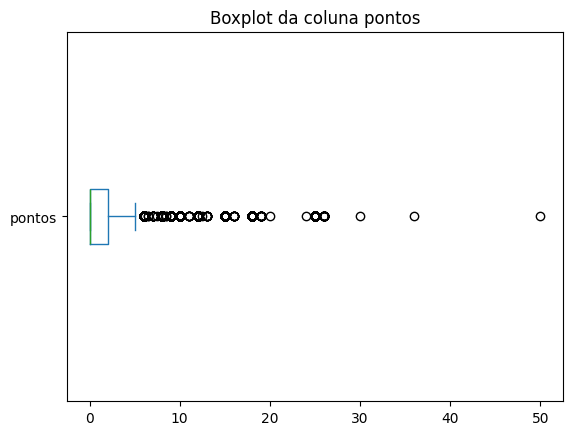

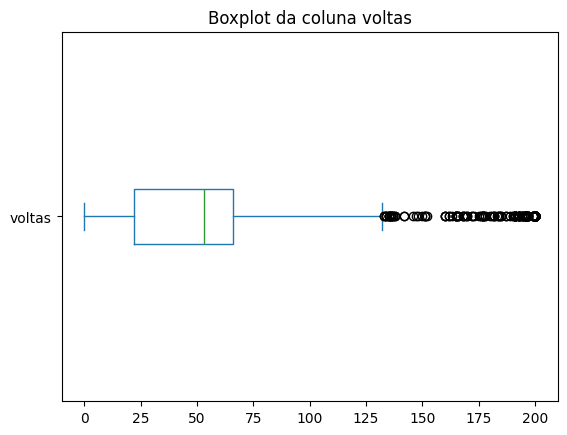

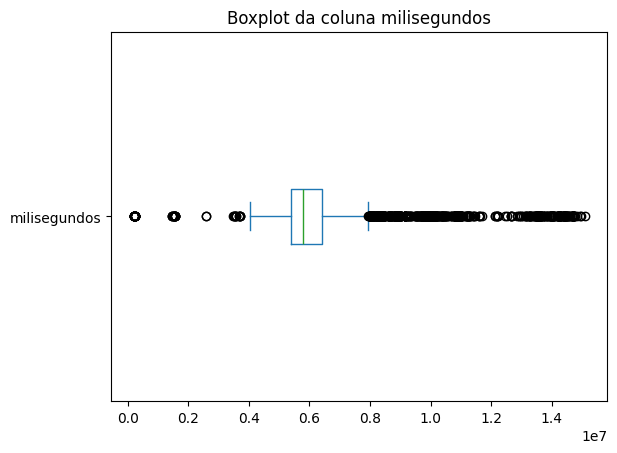

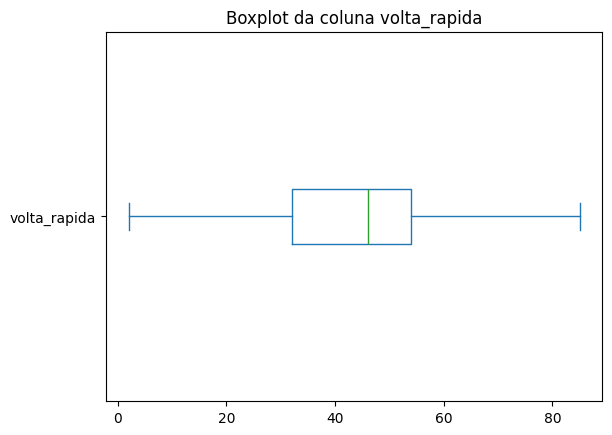

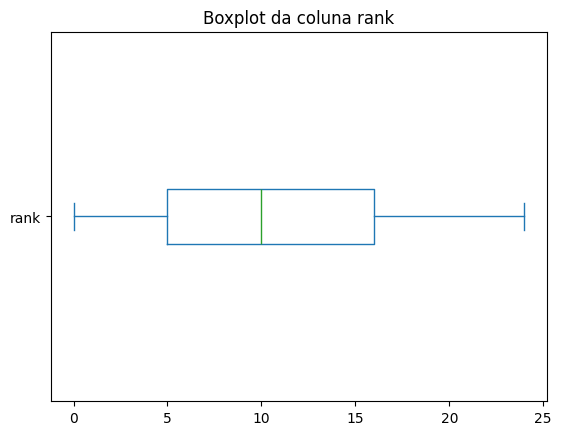

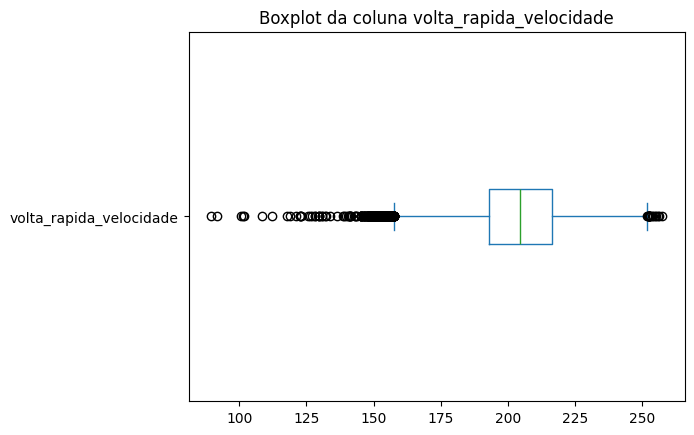

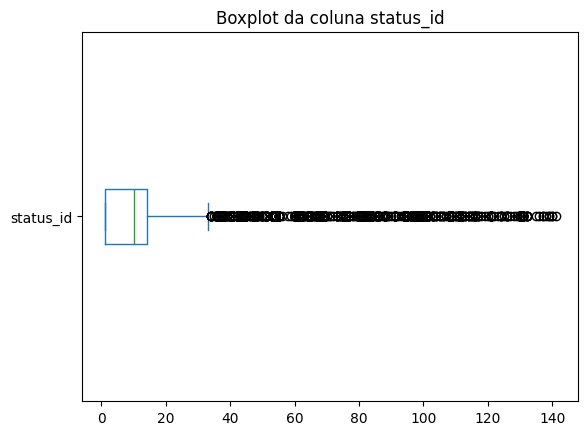

In [41]:
# Crie um boxplot para cada coluna numérica
for coluna in resultados.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    resultados[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

#### AE Qualificação

In [54]:
qualificacao

,Unnamed: 0,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao,q1,q2,q3
0,0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...,...
9810,9810,9868,1110,848,3,23,16,2:00.314,NaN,NaN
9811,9811,9869,1110,855,51,24,17,2:00.832,NaN,NaN
9812,9812,9870,1110,858,3,2,18,2:01.535,NaN,NaN
9813,9813,9871,1110,817,213,3,19,2:02.159,NaN,NaN


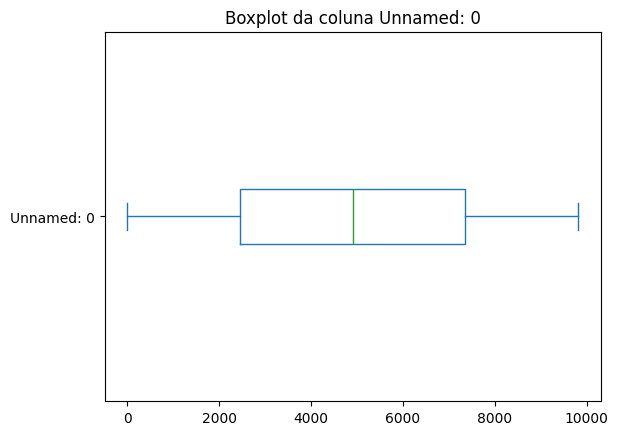

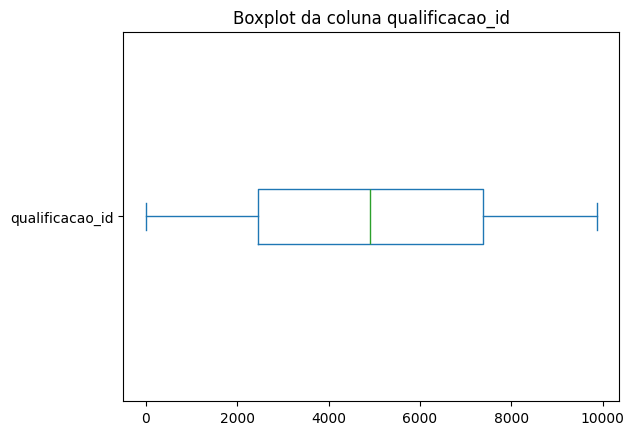

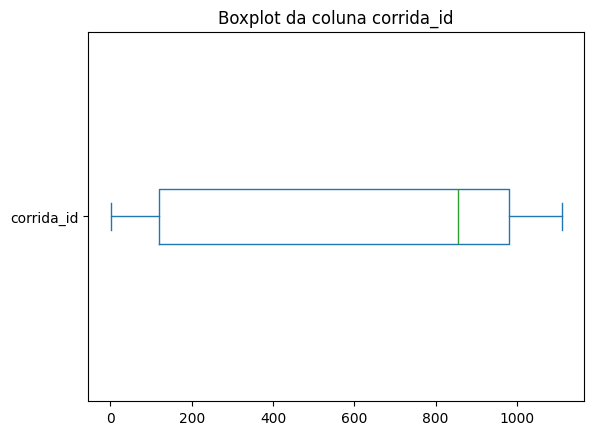

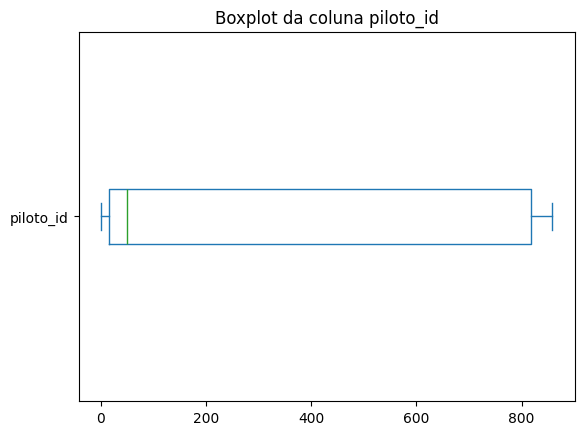

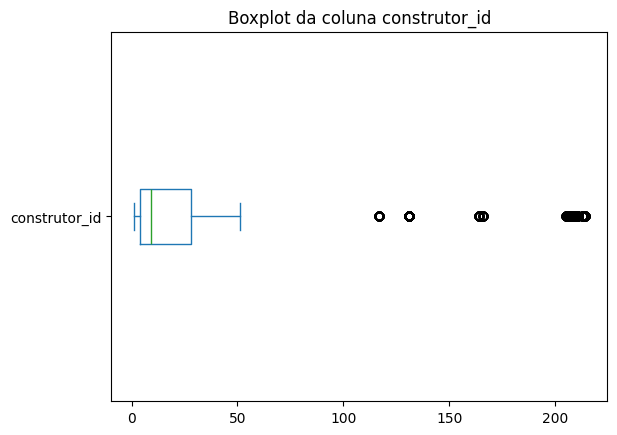

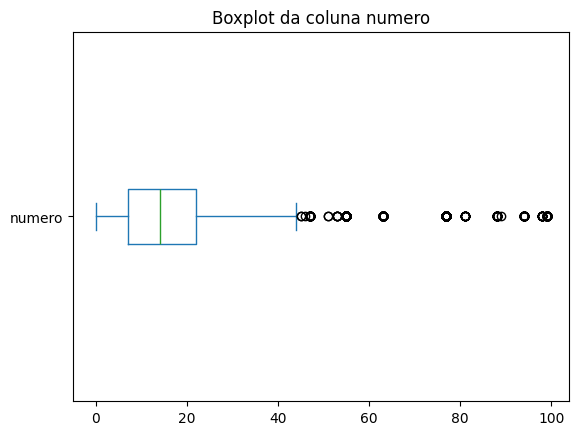

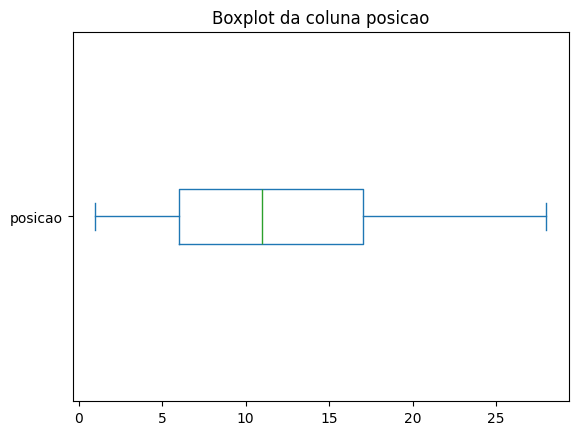

In [43]:
# Crie um boxplot para cada coluna numérica
for coluna in qualificacao.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    qualificacao[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

#### AE Circuitos

In [59]:
circuitos

,circuito_id,circuito_ref,nome,localizacao,pais,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0
...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,NaN


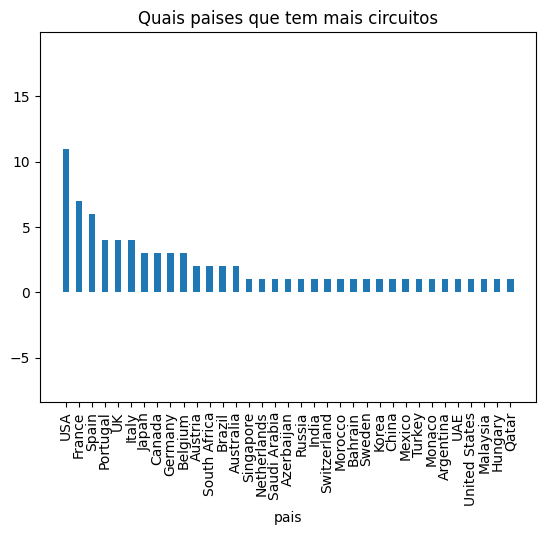

In [44]:
#Distribuição de classificações
count_ratings = circuitos['pais'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='bar')
plt.axis('equal')
plt.title('Quais paises que tem mais circuitos')
plt.show()

#### AE Tempo_Por_Volta (laptimes)

In [60]:
tempo_por_volta

,corrida_id,piloto_id,volta,posicao,tempo,milisegundos
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


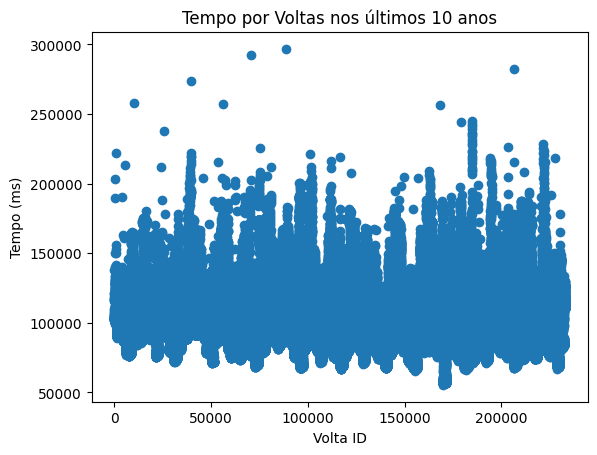

In [45]:
ano = 2023

anos_filtrados = corridas[corridas.ano >= ano - 10]

#Filter down to last ten years of data
voltas_filtradas = tempo_por_volta[tempo_por_volta.corrida_id.isin(anos_filtrados.corrida_id)]
# Filter out extreme outliers
voltas_filtradas = voltas_filtradas[voltas_filtradas.milisegundos <= 300000]

plot_index = [x for x in range(len(voltas_filtradas.milisegundos))]


fig, ax = plt.subplots()

ax.set_xlabel('Volta ID')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Tempo por Voltas nos últimos 10 anos')



plt.scatter(x=plot_index, y=voltas_filtradas.milisegundos)

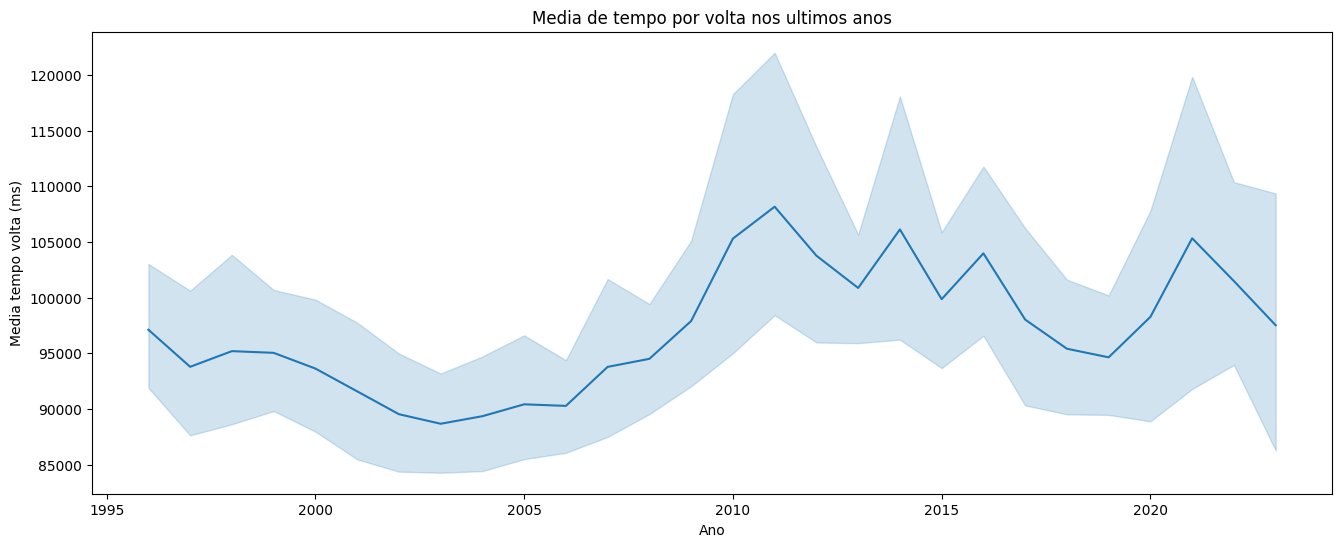

In [46]:
data_corridas_volta = pd.merge(corridas, tempo_por_volta, on='corrida_id')
data_corridas_volta = pd.merge(data_corridas_volta, pilotos, on='piloto_id')
media_tempo_volta = data_corridas_volta.groupby(['ano', 'corrida_id'])['milisegundos'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='ano', y='milisegundos', data=media_tempo_volta)
plt.xlabel('Ano')
plt.ylabel('Media tempo volta (ms)')
plt.title('Media de tempo por volta nos ultimos anos')
plt.show()

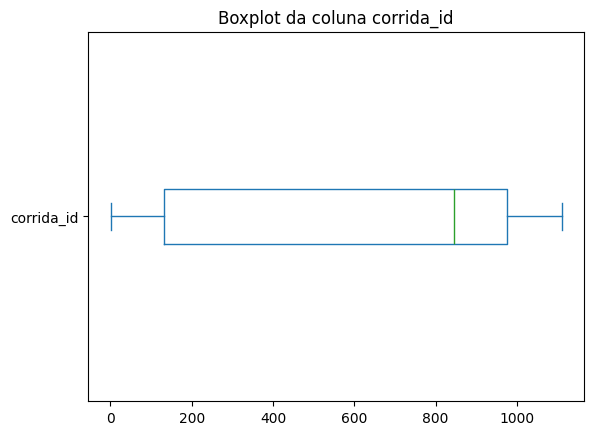

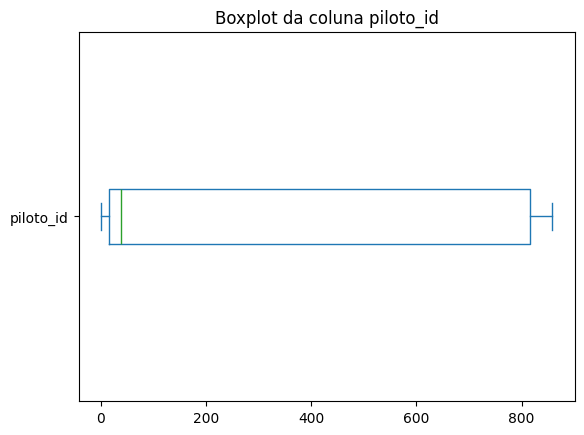

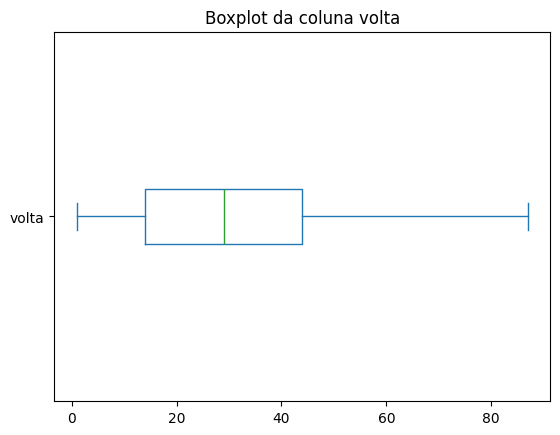

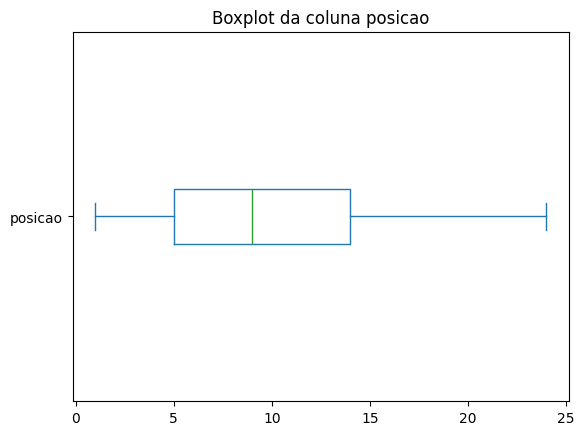

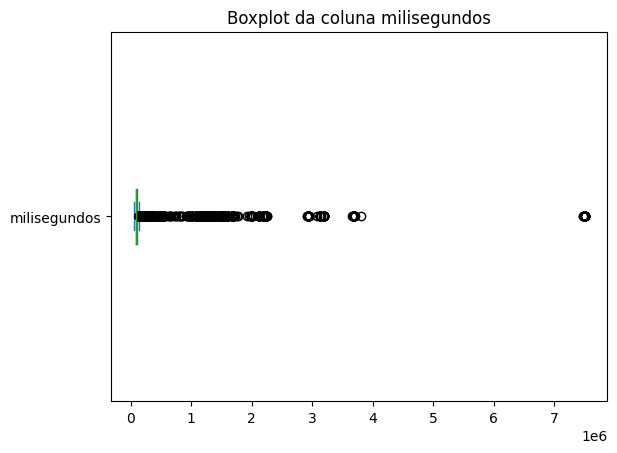

In [47]:
# Crie um boxplot para cada coluna numérica
for coluna in tempo_por_volta.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    tempo_por_volta[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()